In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orgienhaus,2000
1,Invasion of the Reptoids,2011
2,All the President's Men,1976
3,Det glada kalaset,1946
4,Into the Wake,2012


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [18]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d>0.0]))

Superman years:
13


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [19]:
d = c.Batman - c.Superman
print('Batman years:')
print(len(d[d > 0.0]))

Batman years:
24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

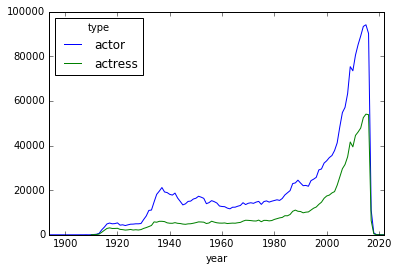

In [20]:
c = cast.groupby(['year','type']).size()
c.unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

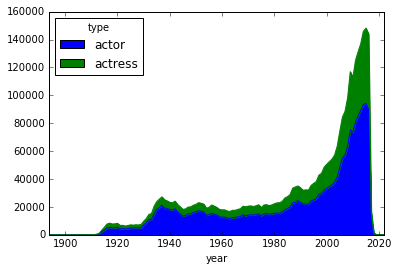

In [21]:
c = cast.groupby(['year','type']).size()
c.unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

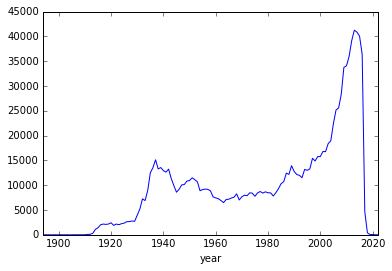

In [22]:
c = cast.groupby(['year','type']).size()
c = c.unstack()
c = c.fillna(0)
d = c.actor - c.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

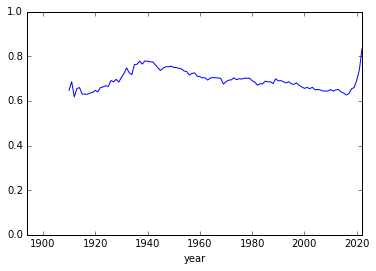

In [36]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
#c = c.fillna(0)
f = c.actor / (c.actor + c.actress)
f.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

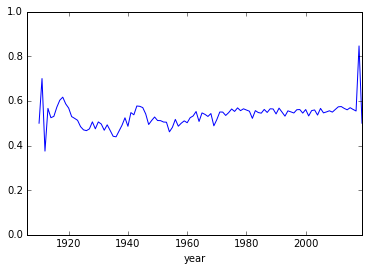

In [12]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

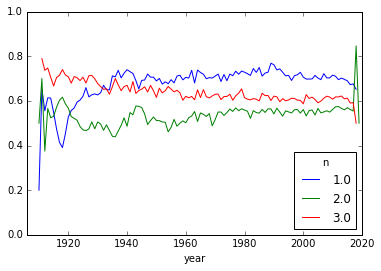

In [41]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
f = c.actor / (c.actor + c.actress)
f = f.unstack('n')
f.plot(ylim=[0,1])